# Feature Selection and Normalize data

In [ ]:
import pandas as pd
df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V5_CV_ALL.csv")
df.columns

#"C:\Maize_Chainat_C\45Datapoint_Master\5VI_RawData_30Mar_Multiparameter_V5_CV_ALL.csv"

Learning rate set to 0.021703
0:	learn: 2.9627498	total: 644us	remaining: 644ms
1:	learn: 2.9515685	total: 1.08ms	remaining: 539ms
2:	learn: 2.9362456	total: 1.51ms	remaining: 501ms
3:	learn: 2.9204893	total: 2.06ms	remaining: 514ms
4:	learn: 2.9021084	total: 2.56ms	remaining: 509ms
5:	learn: 2.8869841	total: 2.98ms	remaining: 494ms
6:	learn: 2.8701398	total: 3.35ms	remaining: 475ms
7:	learn: 2.8545478	total: 3.94ms	remaining: 488ms
8:	learn: 2.8374415	total: 4.36ms	remaining: 481ms
9:	learn: 2.8244704	total: 4.86ms	remaining: 481ms
10:	learn: 2.8041831	total: 5.4ms	remaining: 486ms
11:	learn: 2.7879716	total: 6.05ms	remaining: 498ms
12:	learn: 2.7733729	total: 6.5ms	remaining: 494ms
13:	learn: 2.7589220	total: 6.96ms	remaining: 490ms
14:	learn: 2.7404576	total: 7.54ms	remaining: 495ms
15:	learn: 2.7263933	total: 8.31ms	remaining: 511ms
16:	learn: 2.7106881	total: 8.81ms	remaining: 510ms
17:	learn: 2.6944461	total: 9.3ms	remaining: 508ms
18:	learn: 2.6771515	total: 10ms	remaining: 516m

C:\Users\Nisit\AppData\Local\Temp\ipykernel_13916\1290582339.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
C:\Users\Nisit\AppData\Local\Temp\ipykernel_13916\1290582339.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
C:\Users\Nisit\AppData\Local\Temp\ipykernel_13916\1290582339.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
C:\Users\Nisit\AppData\Local\Temp\ipykernel_13916\1290582339.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
C:\Users\Nisit\AppData\Local\Temp\ipykernel_13916\1290582339.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
C:\Users\Nisit\AppDa

Model: CatBoost Regression
Train MSE: 0.0012629781846412577
Test MSE: 4.769011171524263
Train RMSE: 0.035538404362622386
Test RMSE: 2.183806578322417
Train R-squared: 0.9998697811471902
Test R-squared: 0.5340852672856529
Train MAE: 0.029368065632232772
Test MAE: 1.6846611376604332
Train Adjusted R-squared: 0.9998311977833947
Test Adjusted R-squared: -inf

Model: Decision Tree Regression
Train MSE: 0.0
Test MSE: 2.2533333333333325
Train RMSE: 0.0
Test RMSE: 1.5011106998930268
Train R-squared: 1.0
Test R-squared: 0.7798576769991559
Train MAE: 0.0
Test MAE: 1.3555555555555554
Train Adjusted R-squared: 1.0
Test Adjusted R-squared: -inf

Model: ElasticNet Regression
Train MSE: 6.704165212681963
Test MSE: 9.234431365090128
Train RMSE: 2.5892402771241536
Test RMSE: 3.0388207194716386
Train R-squared: 0.3087697684255051
Test R-squared: 0.09783024897804815
Train MAE: 2.146936167024894
Test MAE: 2.6904933502880883
Train Adjusted R-squared: 0.10396081092195097
Test Adjusted R-squared: -inf

Model

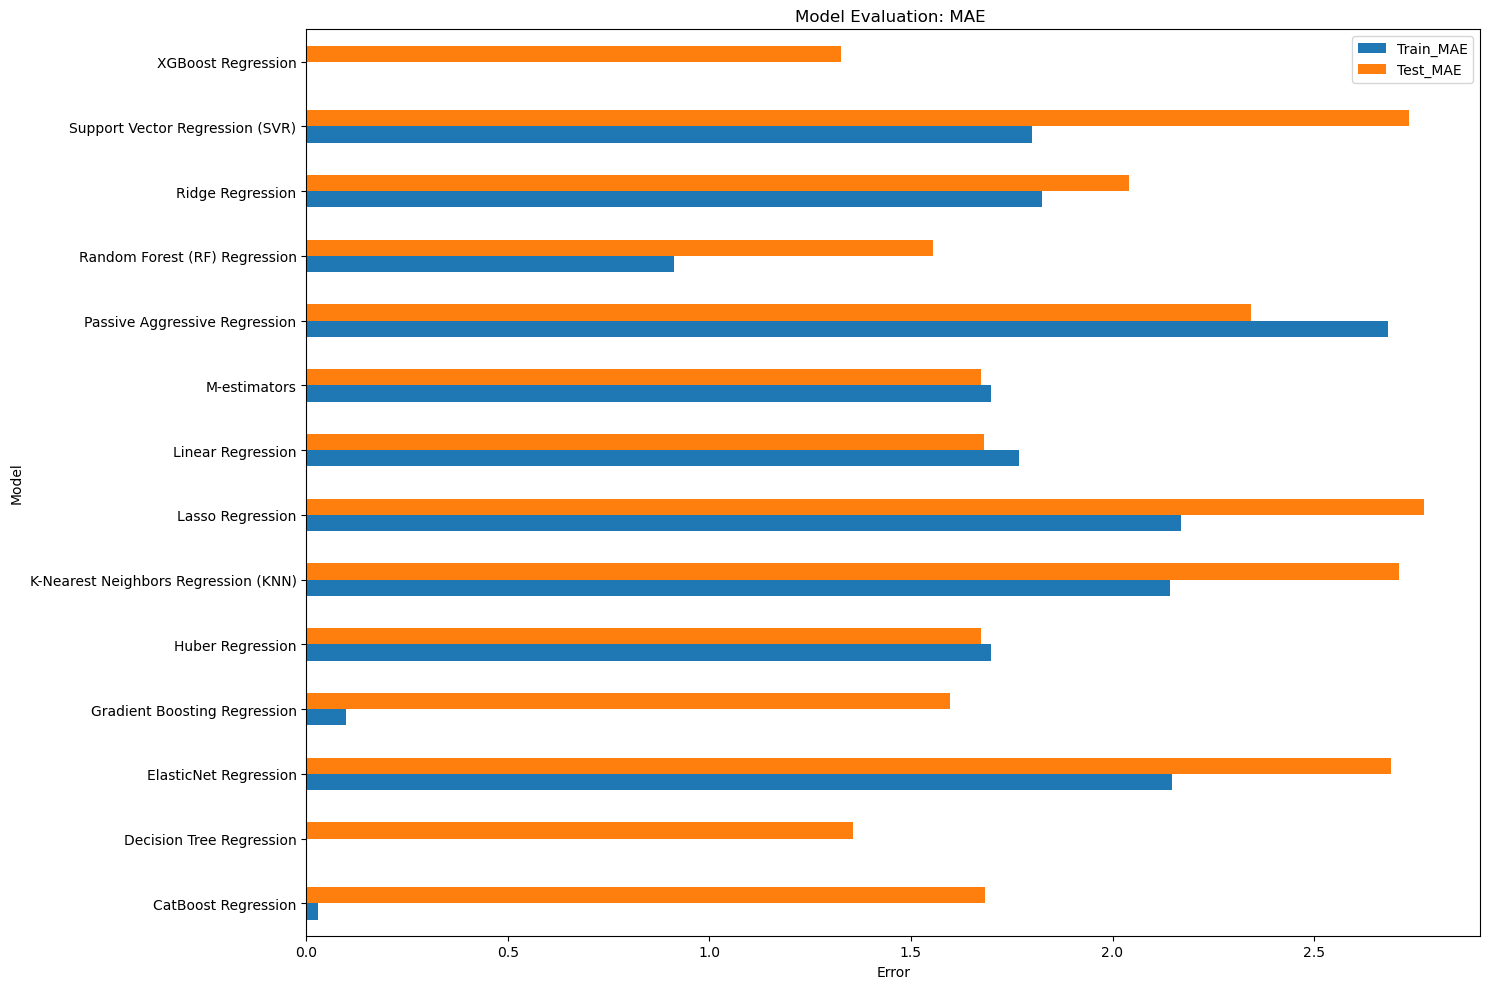

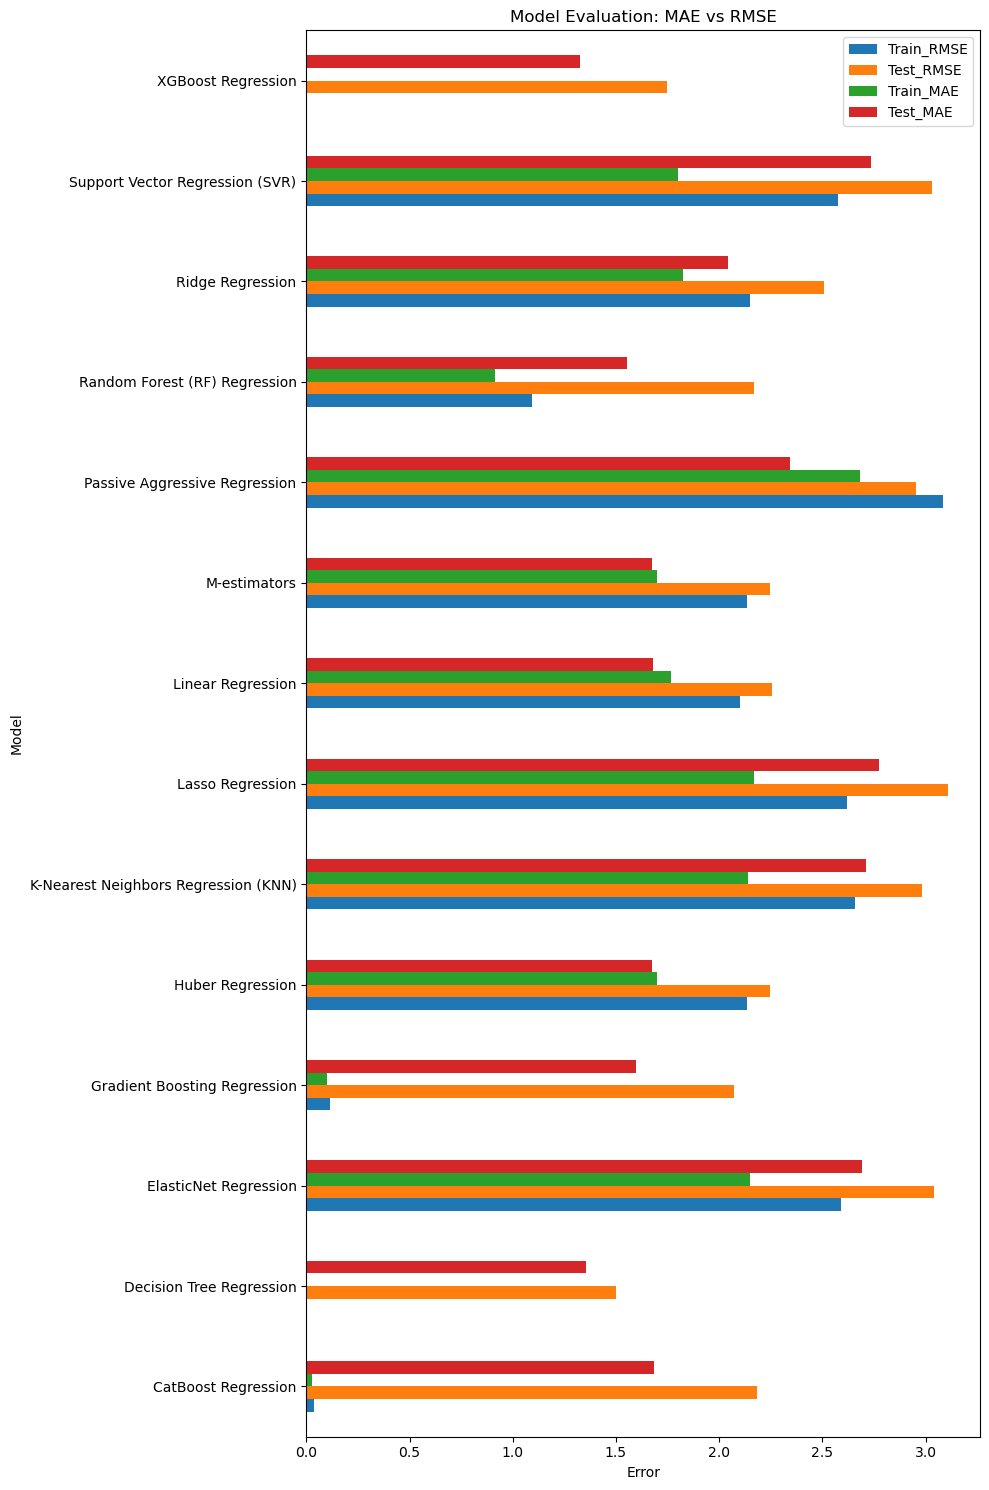

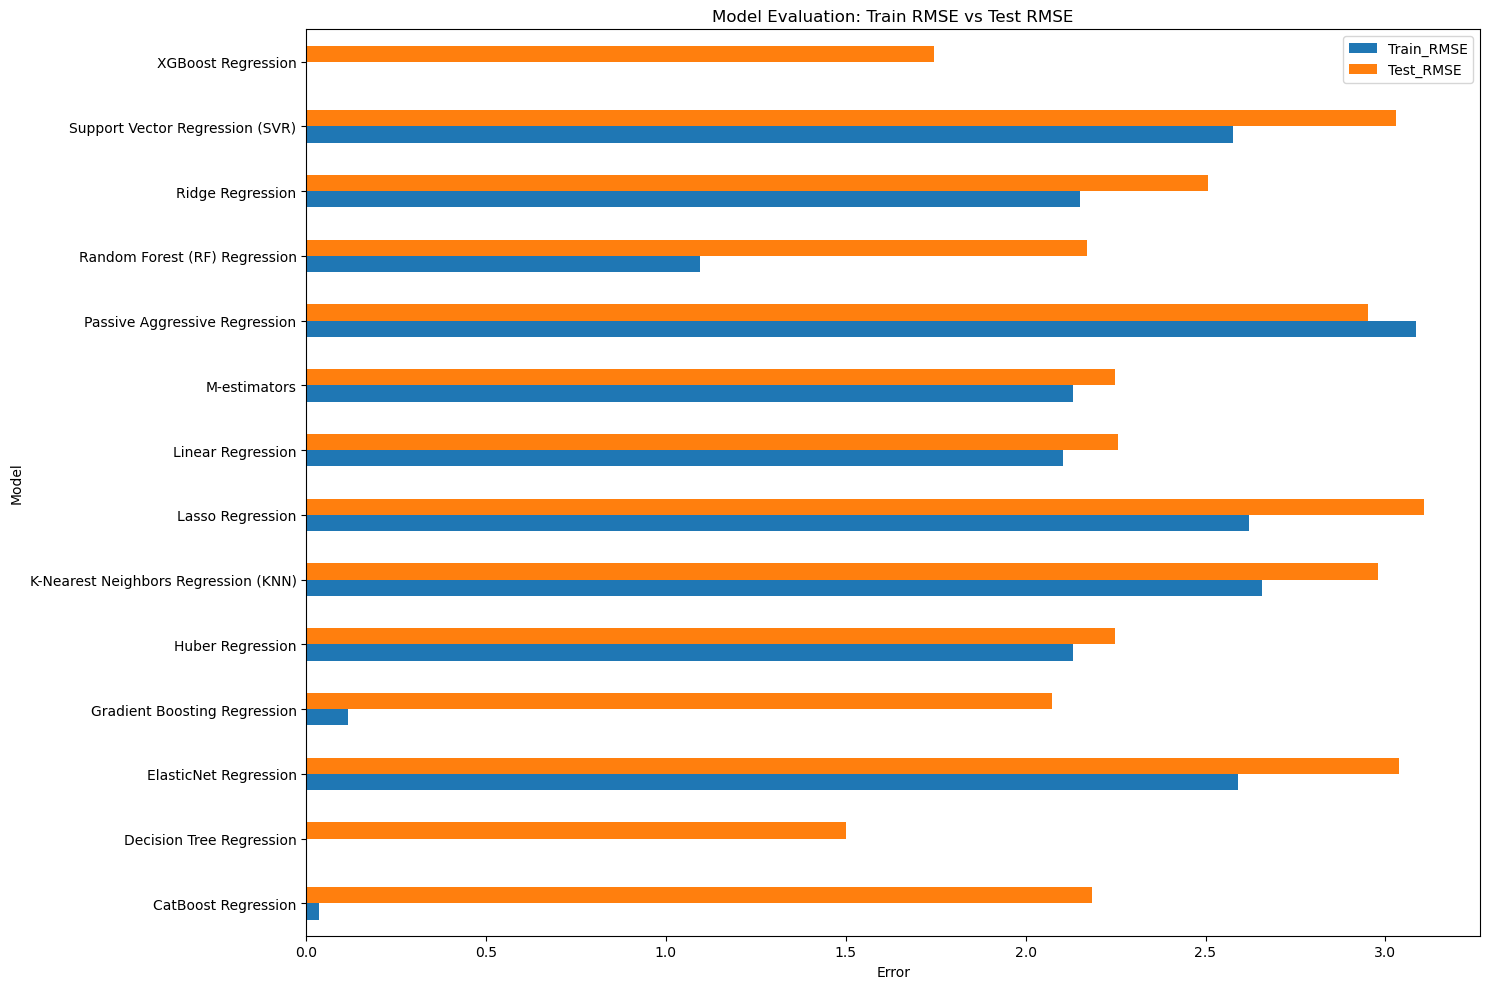

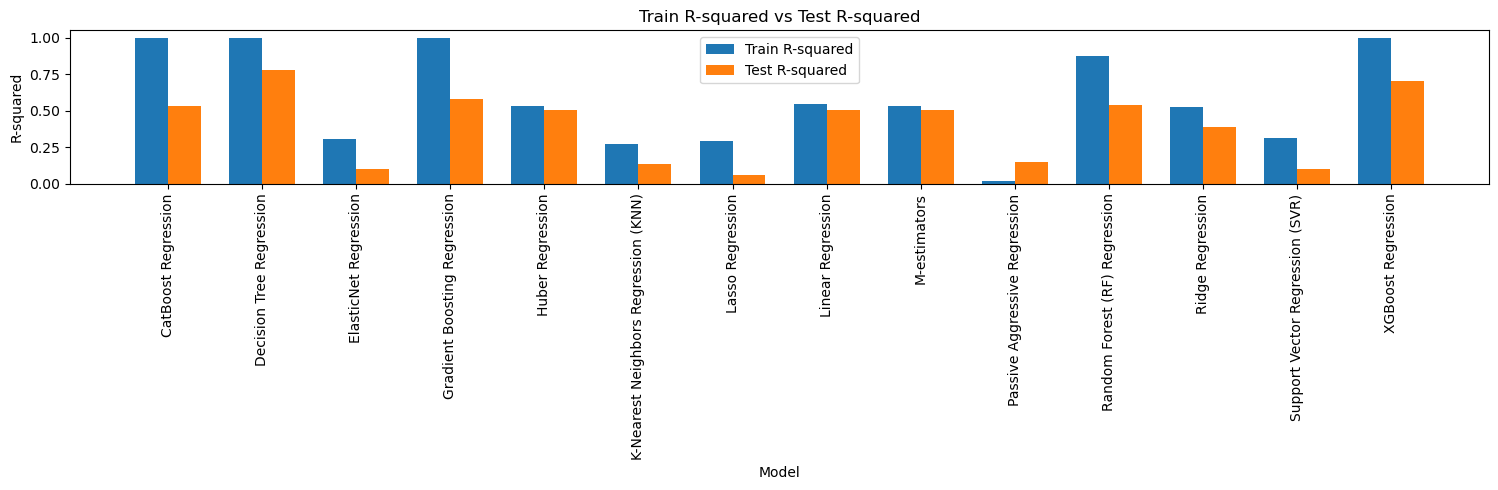

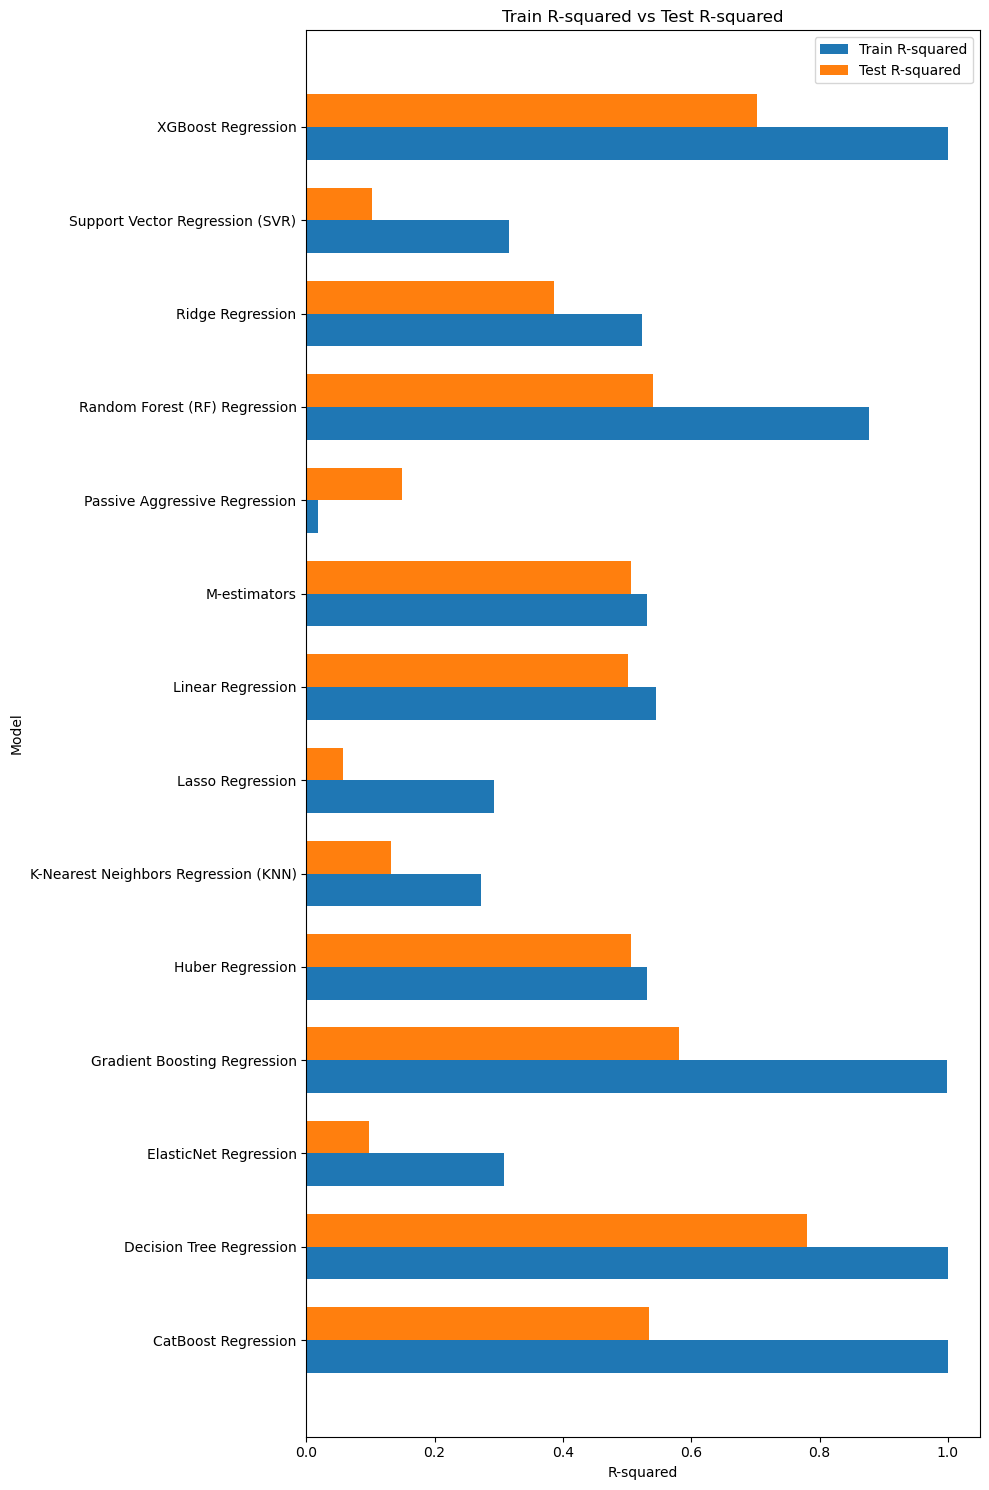

C:\Users\Nisit\AppData\Local\Temp\ipykernel_13916\1290582339.py:291: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(results_df['Model'], rotation=60)


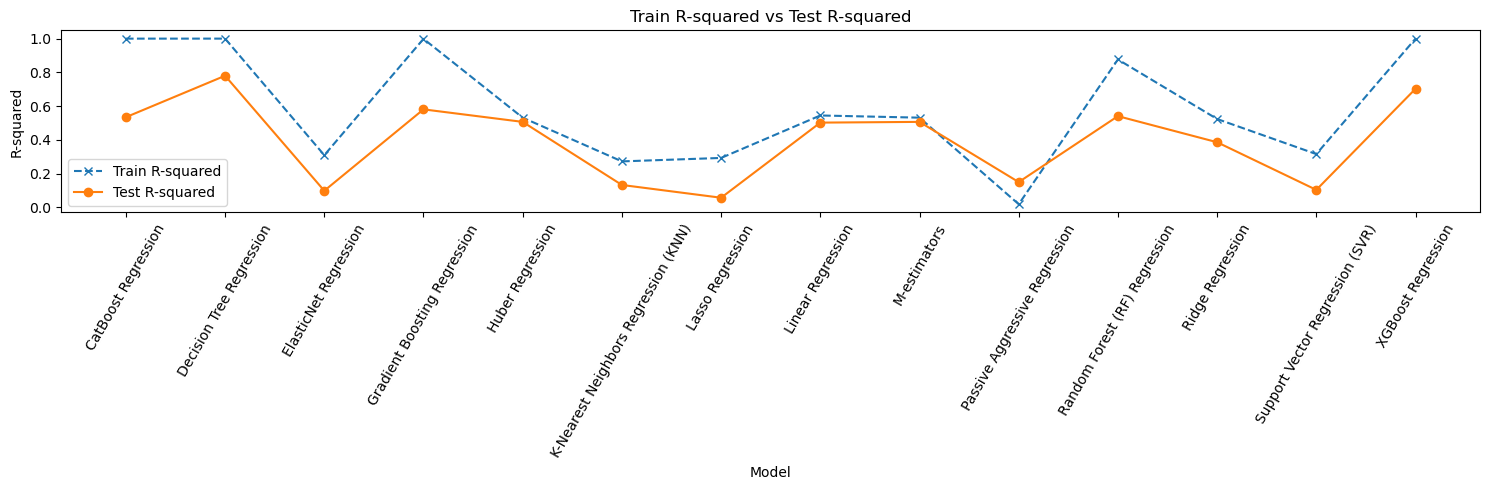

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor,  PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_score

# Read the DataFrame from the CSV file
df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V5_CV_ALL.csv")


# X = df['NDVI_CV'].values.reshape(-1, 1)  # Assuming it's a single feature and reshaping it to a 2D array

######Vi_CD_16Feature Environment data
# X = df[['NDVI_CV','Maize_high(m)','N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC',
#        'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration',
#        'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']]

######Vi_CD_6Feature selection
X = df[['NDVI_CV','P', 'K', 'SoilHumi', 'EC', 
      'Wind speed', 'Temperature','Evapotranspiration']]

y = df['Seed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale/normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list to store the evaluation metrics for each model
results = []

# Define the regression models
models = [
    ("CatBoost Regression", CatBoostRegressor()),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("ElasticNet Regression", ElasticNet()),
    ("Gradient Boosting Regression", GradientBoostingRegressor()),
    ("Huber Regression", HuberRegressor()),
    ("K-Nearest Neighbors Regression (KNN)", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ('M-estimators', HuberRegressor(epsilon=1.35)),
    ("Passive Aggressive Regression", PassiveAggressiveRegressor()),
    ("Random Forest (RF) Regression", RandomForestRegressor()), 
    ("Ridge Regression", Ridge()), 
    ("Support Vector Regression (SVR)", SVR()),
    ("XGBoost Regression", XGBRegressor())
]
# Iterate over the models and evaluate their performance
for model_name, model in models:
    # Perform cross-validation and calculate evaluation metrics
    #scores = cross_val_score(model, X_train, y_train, cv=2, scoring='neg_mean_absolute_error')
    scores = cross_val_score(model, X_train_scaled, y_train, cv=2, scoring='neg_mean_absolute_error')
    mae_train_cv = -scores.mean()

    # Train the model
    model.fit(X_train_scaled, y_train)
    #model.fit(X_train, y_train)
    
    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    # y_train_pred = model.predict(X_train)
    # y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    
    # Calculate adjusted R-squared
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
    adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

    # Append the results to the list
    results.append({
        'Model': model_name,
        'Train_MAE': mae_train,
        'Test_MAE': mae_test,
        'Train_MSE': mse_train,
        'Test_MSE': mse_test,
        'Train_RMSE': rmse_train,
        'Test_RMSE': rmse_test,
        'Train_R2': r2_train,
        'Test_R2': r2_test,
        'Adj_R2_train': adj_r2_train,
        'Adj_R2_test': adj_r2_test
    })

# Print the evaluation metrics
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Train MSE: {result['Train_MSE']}")
    print(f"Test MSE: {result['Test_MSE']}")
    print(f"Train RMSE: {result['Train_RMSE']}")
    print(f"Test RMSE: {result['Test_RMSE']}")
    print(f"Train R-squared: {result['Train_R2']}")
    print(f"Test R-squared: {result['Test_R2']}")
    print(f"Train MAE: {result['Train_MAE']}")
    print(f"Test MAE: {result['Test_MAE']}")
    print(f"Train Adjusted R-squared: {result['Adj_R2_train']}")
    print(f"Test Adjusted R-squared: {result['Adj_R2_test']}")
    print()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

##############################################
##############################################
##############################################
##############################################
# Save the evaluation metrics into a DataFrame
##############################################
##############################################
##############################################
#results_df.to_csv('Scenario1_ViCD_14ML_NDVI.csv')
results_df.to_csv("C:/Maize_Chainat_C/SCN3/NDVI_CV_6FE.csv")


# Create horizontal bar charts for visualization
fig, ax = plt.subplots(figsize=(15, 10), facecolor='none')

# Define the metrics DataFrame
metrics_df = results_df[['Model', 'Train_MAE', 'Test_MAE']]

# MAE vs RMSE
metrics_df.plot(x='Model', y=['Train_MAE', 'Test_MAE'], kind='barh', ax=ax)

ax.set_xlabel('Error')
ax.set_title('Model Evaluation: MAE ')

# Manually set y-axis tick locations and labels
yticks = range(len(metrics_df))
yticklabels = metrics_df['Model']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

plt.tight_layout()
plt.show()

# Create horizontal bar charts for visualization
fig, ax = plt.subplots(figsize=(10, 15), facecolor='none')

# MAE vs RMSE
metrics_df = results_df[['Model', 'Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE']]
metrics_df.plot(x='Model', y=['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE'], kind='barh', ax=ax)

ax.set_xlabel('Error')
ax.set_title('Model Evaluation: MAE vs RMSE')

# Manually set y-axis tick locations and labels
yticks = range(len(metrics_df))
yticklabels = metrics_df['Model']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

plt.tight_layout()
plt.show()

# Train RMSE vs Test RMSE
fig, ax = plt.subplots(figsize=(15, 10), facecolor='none')

metrics_df.plot(x='Model', y=['Train_RMSE', 'Test_RMSE'], kind='barh', ax=ax)

ax.set_xlabel('Error')
ax.set_title('Model Evaluation: Train RMSE vs Test RMSE')

yticks = range(len(metrics_df))
yticklabels = metrics_df['Model']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

plt.tight_layout()
plt.show()

# R-squared
###########################
fig, ax = plt.subplots(figsize=(15, 5))

# Set the x-axis positions for the bars
x_pos = np.arange(len(results_df['Model']))

# Set the width of the bars
width = 0.35

# Plot Train R-squared as bars
ax.bar(x_pos - width/2, results_df['Train_R2'], width, label='Train R-squared')

# Plot Test R-squared as bars
ax.bar(x_pos + width/2, results_df['Test_R2'], width, label='Test R-squared')

# Set the x-axis label
ax.set_xlabel('Model')

# Set the y-axis label
ax.set_ylabel('R-squared')

# Set the chart title
ax.set_title('Train R-squared vs Test R-squared')

# Set the x-axis tick positions and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Model'], rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

########Horizontal###################

fig, ax = plt.subplots(figsize=(10, 15))

# Set the y-axis positions for the bars
y_pos = np.arange(len(results_df['Model']))

# Set the height of the bars
height = 0.35

# Plot Train R-squared as horizontal bars
ax.barh(y_pos - height/2, results_df['Train_R2'], height, label='Train R-squared')

# Plot Test R-squared as horizontal bars
ax.barh(y_pos + height/2, results_df['Test_R2'], height, label='Test R-squared')

# Set the y-axis label
ax.set_ylabel('Model')

# Set the x-axis label
ax.set_xlabel('R-squared')

# Set the chart title
ax.set_title('Train R-squared vs Test R-squared')

# Set the y-axis tick positions and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(results_df['Model'])

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


#########################
# Plot Train R-squared vs Test R-squared
fig, ax = plt.subplots(figsize=(15, 5))

# Plot Train R-squared
ax.plot(results_df['Model'], results_df['Train_R2'], label='Train R-squared', marker='x',linestyle='dashed')

# Plot Test R-squared
ax.plot(results_df['Model'], results_df['Test_R2'], label='Test R-squared', marker='o', ) #linewidth=3, linestyle='dashed'

# Set the x-axis label
ax.set_xlabel('Model')

# Set the y-axis label
ax.set_ylabel('R-squared')

# Set the chart title
ax.set_title('Train R-squared vs Test R-squared')

# Set the x-axis tick labels
ax.set_xticklabels(results_df['Model'], rotation=60)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Feature Select Cross Validate

In [ ]:
# Index(['id', 'Plot_Name', 'Latitude', 'Longitude', 'Seed', '30Mar_CIgr',
#        '30Mar_Cire', '30Mar_EVI2', '30Mar_NDRE', '30Mar_NDVI', 'Maize_high',
#        'N', 'P', 'K', 'pH', 'SoilTemp', 'SoliHumi', 'EC',
#        'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration',
#        'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature'],
#       dtype='object')

#'Wind speed' = 0.74 76 XGBoost Regression   
# 'Wind speed','Water feed Per Area (m3/dunam)= Gradient Boosting 0.73 , XGBoost 0.72
# 'Water feed Per Area (m3/dunam),'Humidity' = XG 0.79, Gradient Boosting0.74
# 12Feture = XG , Gra = 0.72
# 'SoliTemp', XG , Gra = 0.78
# 'EC', XG , Gra = 0.77
# 'N' = 0.77
#, 'Temperature'
#'Uv radiation' = 0.81 , 0.79
# 'K', = 0.81 , 0.78
# 'pH', = 0.82 , 0.77
#,'SoliHumi'

###0.83,0.78
# X = df[['30Mar_Cire', 'K', 'SoliHumi'
#         ,'Wind speed','Temperature','Evapotranspiration']]
###0.81,0.80

# X = df[['30Mar_Cire', 'P', 'K', 'pH', 'SoilTemp', 'SoliHumi', 'EC',
#         'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature']]

#######Best on 30 June
# X = df[['30Mar_Cire','P','K', 'SoliHumi','Wind speed'
#         ,'Temperature','Evapotranspiration']]

#######7 July add CHM
# X = df[['30Mar_Cire','P','K', 'SoilHumi','Wind speed'
#         ,'Temperature','Evapotranspiration','30Mar_Cire_CHM']]

#######9 July '30Mar_Cire_CHM' remove '30Mar_Cire',
# X = df[['P','K', 'SoilHumi','Wind speed'
#         ,'Temperature','Evapotranspiration','30Mar_Cire_CHM']]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import HuberRegressor, RANSACRegressor, TheilSenRegressor, PassiveAggressiveRegressor
from sklearn.pipeline import make_pipeline

# Read the DataFrame from the CSV file
df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V1.csv")

X = df[['30Mar_Cire', 'P', 'K', 'SoilHumi', 'Wind speed', 'Temperature', 'Evapotranspiration', 'CHM_mean']]
y = df['Seed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list to store the evaluation metrics for each model
results = []

# Define the regression models
models = [
    ("Linear Regression", LinearRegression()), 
    ("Ridge Regression", Ridge()), 
    ("Lasso Regression", Lasso()), 
    ("ElasticNet Regression", ElasticNet()),
    #("Polynomial Regression (Degree 2)", make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ("SVR", SVR()), 
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("Random Forest Regression", RandomForestRegressor()), 
    ("Gradient Boosting Regression", GradientBoostingRegressor()),
    ("XGBoost Regression", XGBRegressor()), 
    ("LightGBM Regression", LGBMRegressor()),
    ("CatBoost Regression", CatBoostRegressor()),
    ("MLP Regression", MLPRegressor()), 
    ("K-Nearest Neighbors Regression (KNN)", KNeighborsRegressor()),
    #("Gaussian Process Regression", GaussianProcessRegressor()),
    ("Huber Regression", HuberRegressor()), 
    ('M-estimators', HuberRegressor(epsilon=1.35)),
    ('Huber Regression_1', HuberRegressor(epsilon=1.0)),
    ("RANSAC Regression", RANSACRegressor()), 
    ("TheilSen Regression", TheilSenRegressor()), 
    ("Passive Aggressive Regression", PassiveAggressiveRegressor())
]

# Iterate over the models and evaluate their performance
for model_name, model in models:
    # Perform cross-validation and calculate evaluation metrics
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_train_cv = -scores.mean()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics for the testing set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Append the results to the list
    results.append({
        'Model': model_name,
        'Train_MAE_CV': mae_train_cv,
        'Test_MAE': mae_test,
        'Test_RMSE': rmse_test,
        'Test_R2': r2_test,
    })

# Print the evaluation metrics
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Train MAE (CV): {result['Train_MAE_CV']}")
    print(f"Test MAE: {result['Test_MAE']}")
    print(f"Test RMSE: {result['Test_RMSE']}")
    print(f"Test R-squared: {result['Test_R2']}")
    print()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the evaluation metrics into a DataFrame
results_df.to_csv('7FeaturesCIRE_21ML_CrossValidate1_CHM.csv')

# Create horizontal bar charts for visualization
fig, ax = plt.subplots(figsize=(15, 10), facecolor='none')

# Define the metrics DataFrame
metrics_df = results_df[['Model', 'Train_MAE_CV', 'Test_MAE']]

# MAE (CV) vs Test MAE
metrics_df.plot(x='Model', y=['Train_MAE_CV', 'Test_MAE'], kind='barh', ax=ax)

ax.set_xlabel('Mean Absolute Error')
ax.set_title('Model Evaluation: MAE (CV) vs Test MAE')

# Manually set y-axis tick locations and labels
yticks = range(len(metrics_df))
yticklabels = metrics_df['Model']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

plt.tight_layout()
plt.show()
